# Klasyfikacja liniowa

In [1]:
from sklearn.linear_model import RidgeClassifier
import numpy as np
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, roc_curve, RocCurveDisplay, auc
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.feature_selection import SequentialFeatureSelector
import time

In [2]:
#poprawić, żeby były dwie cechy i zwizualizować powierzchnie decyzyjne do tego
x, y = make_classification(n_samples=2548, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=254448)

x1, y1 = make_moons(n_samples=2548, random_state=254448)

# labels for ridge classification should be -1, 1
y[y==0]=-1
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=254448, stratify=y)

y1[y1==0]=-1
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=254448, stratify=y1)

## Analityczna wersja klasyfikacji liniowej z regularyzacją Tichonowa

In [3]:
class AnalyticalRidgeClassifierImplementation():
    
    def build_classifier(self, x, y, lbd=1):
        x = np.concatenate([np.ones((len(x), 1)), x], axis=1)
        xt = x.T
        xtx = np.matmul(xt, x)
        xty = np.matmul(xt, y)
        w = np.matmul(np.linalg.inv(xtx+lbd*np.eye(len(xtx))),xty)
        #pierwsza współrzędna b
        self.w = np.reshape(w, (-1,1))
        return np.reshape(w, (-1,1))
    
    def predict_target(self, x):
        x = np.concatenate([np.ones((len(x), 1)), x], axis=1)
        y_target = np.matmul(x, self.w)
        y_target[y_target>=0] = 1
        y_target[y_target<0] = -1
        return y_target
    
    def predict_target_ROC(self, x):
        x = np.concatenate([np.ones((len(x), 1)), x], axis=1)
        y_target = np.matmul(x, self.w)
        return y_target
    

## Porównanie klasyfikacji

### Własna implementacja

zbiór make_classification

In [4]:
lin_clas = AnalyticalRidgeClassifierImplementation()
lin_clas.build_classifier(x_train, y_train)

array([[0.00910257],
       [0.54629875],
       [0.06526408]])

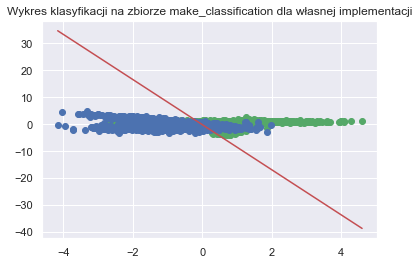

In [5]:
x_graph = np.linspace(np.min(x[:,0]),np.max(x[:,0]),100)

plt.scatter(x[:,0][y==1], x[:,1][y==1], color='g')
plt.scatter(x[:,0][y==-1], x[:,1][y==-1], color='b')
plt.title('Wykres klasyfikacji na zbiorze make_classification dla własnej implementacji')
plt.plot(x_graph, (-1*lin_clas.w[1]*x_graph-lin_clas.w[0])/lin_clas.w[2], color='r')
plt.show()

0.8979591836734694

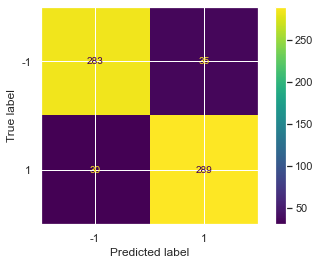

In [6]:
y_predict = lin_clas.predict_target(x_test)
acc1 = accuracy_score(y_test, y_predict)
cm1 = confusion_matrix(y_test, y_predict, labels=[-1,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[-1,1])
disp.plot()
acc1

In [7]:
sensitivity = recall_score(y_test, y_predict)
sensitivity

0.9059561128526645

In [8]:
specificity = cm1[0][0]/(cm1[0][0]+cm1[0][1])
specificity

0.889937106918239

zbiór make_moons

In [9]:
lin_clas1 = AnalyticalRidgeClassifierImplementation()
lin_clas1.build_classifier(x_train1, y_train1)

array([[ 0.16395514],
       [ 0.32330706],
       [-1.32683194]])

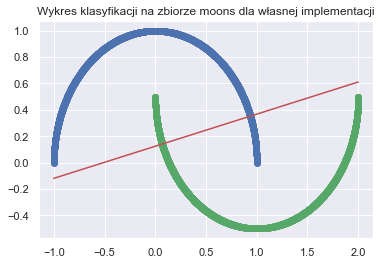

In [10]:
x_graph = np.linspace(np.min(x1[:,0]),np.max(x1[:,0]),100)

plt.scatter(x1[:,0][y1==1], x1[:,1][y1==1], color='g')
plt.scatter(x1[:,0][y1==-1], x1[:,1][y1==-1], color='b')
plt.title('Wykres klasyfikacji na zbiorze moons dla własnej implementacji')
plt.plot(x_graph, (-1*lin_clas1.w[1]*x_graph-lin_clas1.w[0])/lin_clas1.w[2], color='r')
plt.show()

0.8901098901098901

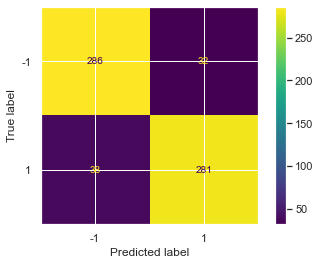

In [11]:
y_predict_moons = lin_clas1.predict_target(x_test1)
acc_moons = accuracy_score(y_test1, y_predict_moons)
cm1_moons = confusion_matrix(y_test1, y_predict_moons, labels=[-1,1])
disp_moons = ConfusionMatrixDisplay(confusion_matrix=cm1_moons, display_labels=[-1,1])
disp_moons.plot()
acc_moons

In [12]:
sensitivity_moons = recall_score(y_test1, y_predict_moons)
sensitivity_moons

0.8808777429467085

In [13]:
specificity_moons = cm1_moons[0][0]/(cm1_moons[0][0]+cm1_moons[0][1])
specificity_moons

0.89937106918239

### Implementacja ze sklearn

Zbiór danych make_classification

In [14]:
ridge_cl = RidgeClassifier(alpha=1)
ridge_cl.fit(x_train, y_train)
y_predict2 = ridge_cl.predict(x_test)

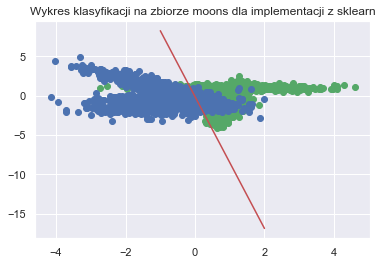

In [15]:
plt.scatter(x[:,0][y==1], x[:,1][y==1], color='g')
plt.scatter(x[:,0][y==-1], x[:,1][y==-1], color='b')
plt.title('Wykres klasyfikacji na zbiorze moons dla implementacji z sklearn')
plt.plot(x_graph, (-1*ridge_cl.coef_[:,0]*x_graph-ridge_cl.intercept_[0])/ridge_cl.coef_[:,1], color='r')
plt.show()

0.8979591836734694

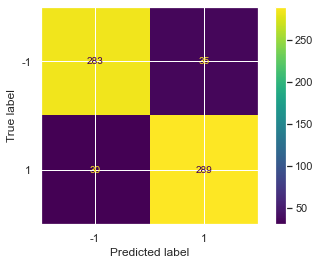

In [16]:
acc2 = accuracy_score(y_test, y_predict2)
cm2 = confusion_matrix(y_test, y_predict2, labels=[-1,1])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[-1,1])
disp2.plot()
acc2

In [17]:
sensitivity2 = recall_score(y_test, y_predict2)
sensitivity2

0.9059561128526645

In [18]:
specificity2 = cm1[0][0]/(cm1[0][0]+cm1[0][1])
specificity2

0.889937106918239

Zbiór danych moons

In [19]:
ridge_cl_moons = RidgeClassifier(alpha=1)
ridge_cl_moons.fit(x_train1, y_train1)
y_predict_2_moons = ridge_cl_moons.predict(x_test1)

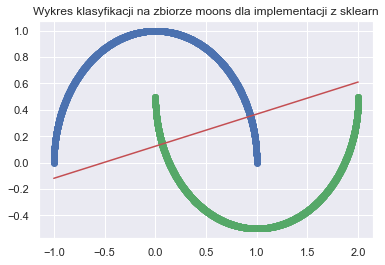

In [20]:
plt.scatter(x1[:,0][y1==1], x1[:,1][y1==1], color='g')
plt.scatter(x1[:,0][y1==-1], x1[:,1][y1==-1], color='b')
plt.title('Wykres klasyfikacji na zbiorze moons dla implementacji z sklearn')
plt.plot(x_graph, (-1*ridge_cl_moons.coef_[:,0]*x_graph-ridge_cl_moons.intercept_[0])/ridge_cl_moons.coef_[:,1], color='r')
plt.show()

0.8901098901098901

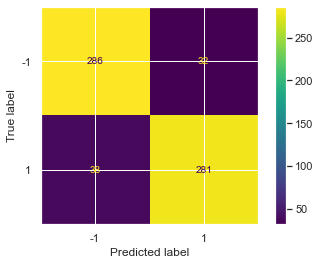

In [21]:
acc2_moons = accuracy_score(y_test1, y_predict_2_moons)
cm2_moons = confusion_matrix(y_test1, y_predict_2_moons, labels=[-1,1])
disp2_moons = ConfusionMatrixDisplay(confusion_matrix=cm2_moons, display_labels=[-1,1])
disp2_moons.plot()
acc2_moons

In [22]:
sensitivity_moons2 = recall_score(y_test1, y_predict_2_moons)
sensitivity_moons2

0.8808777429467085

In [23]:
specificity_moons2 = cm2_moons[0][0]/(cm2_moons[0][0]+cm2_moons[0][1])
specificity_moons2

0.89937106918239

### Porównanie

Krzywe ROC dla klasyfikatora z sklearn oraz własnej implementacji dla zbioru stworzonego za pomocą funkcji make_classification

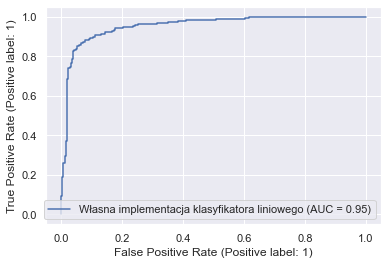

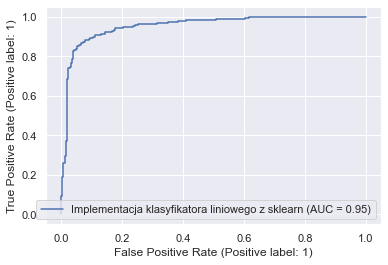

In [24]:
y_roc_i = lin_clas.predict_target_ROC(x_test)
y_roc_s = ridge_cl.decision_function(x_test)

fpr_i, tpr_i, tresholds_i = roc_curve(y_test, y_roc_i)
fpr_s, tpr_s, tresholds_s = roc_curve(y_test, y_roc_s)
auc_i = auc(fpr_i, tpr_i)
auc_s = auc(fpr_s, tpr_s)

display_i = RocCurveDisplay(fpr=fpr_i, tpr=tpr_i, roc_auc=auc_i, estimator_name='Własna implementacja klasyfikatora liniowego', pos_label=1)
display_s = RocCurveDisplay(fpr=fpr_s, tpr=tpr_s, roc_auc=auc_s, estimator_name='Implementacja klasyfikatora liniowego z sklearn', pos_label=1)
display_i.plot()
display_s.plot()
plt.show()

In [25]:
start1 = time.time()
cl_time = AnalyticalRidgeClassifierImplementation()
for i in range(1001):
    cl_time.build_classifier(x_train, y_train)
    cl_time.predict_target(x_test)
end1 = time.time()
print('czas wykonania dla własnej implementacji:', end1-start1)

czas wykonania dla własnej implementacji: 0.11998343467712402


In [26]:
start2 = time.time()
cl_time2 = RidgeClassifier()
for i in range(1001):
    cl_time2.fit(x_train, y_train)
    cl_time2.predict(x_test)
end2 = time.time()
print('czas wykonania dla implementacji z sklearn:', end2-start2)

czas wykonania dla implementacji z sklearn: 1.2289409637451172


In [27]:
print('zbiór make_classification:')
print('własna implementacja:')
print('accuracy:',acc1)
print('sensitivity:',sensitivity)
print('specificity:',specificity)
print('\n')
print('implementacja z sklearn:')
print('accuracy:', acc2)
print('sensitivity:',sensitivity2)
print('specificity:',specificity2)
print('\n')
print('zbiór make_moons:')
print('własna implementacja:')
print('accuracy:',acc_moons)
print('sensitivity:',sensitivity_moons)
print('specificity:',specificity_moons)
print('\n')
print('implementacja z sklearn:')
print('accuracy:', acc2_moons)
print('sensitivity:',sensitivity_moons2)
print('specificity:',specificity_moons2)
print('\n')

zbiór make_classification:
własna implementacja:
accuracy: 0.8979591836734694
sensitivity: 0.9059561128526645
specificity: 0.889937106918239


implementacja z sklearn:
accuracy: 0.8979591836734694
sensitivity: 0.9059561128526645
specificity: 0.889937106918239


zbiór make_moons:
własna implementacja:
accuracy: 0.8901098901098901
sensitivity: 0.8808777429467085
specificity: 0.89937106918239


implementacja z sklearn:
accuracy: 0.8901098901098901
sensitivity: 0.8808777429467085
specificity: 0.89937106918239




Na danym zbiorze danych, własna implementacja klasyfikatora liniowego oraz implementacja z sklearn radzą sobie równie dobrze. W czasie działania, znacznie szybsza jest własna implementacja.

## Eksploracyjna analiza danych o chorobach serca z Cleveland

In [28]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [29]:
print('Liczba brakujących danych w poszczególnych kolumnach:')
X.isna().sum()

Liczba brakujących danych w poszczególnych kolumnach:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [30]:
#usuwanie wierszy z brakami
X['y'] = y
X = X.dropna()
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
y           0
dtype: int64

In [31]:
#zamiana targetu na 0,1
X['y'] = X['y'].apply(lambda x: 1 if x>0 else -1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_17380\831564005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y'] = X['y'].apply(lambda x: 1 if x>0 else -1)


średnia, odchylenie standardowe, minimum, maksimum dla zmiennych numerycznych

In [32]:
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']].describe(include='all')

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


moda dla zmiennych typu kategorii

In [33]:
X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']].mode()

,sex,cp,fbs,restecg,exang,slope,thal
0,1,4,0,0,0,1,3.0


histogramy cech pokolorowane z zależności od wartości przewidywanych

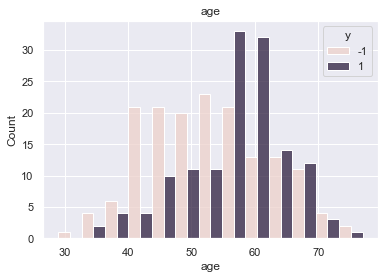

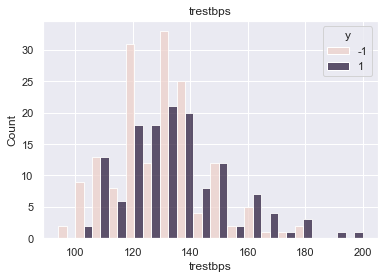

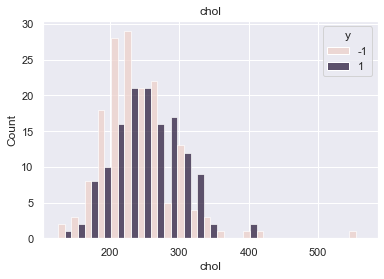

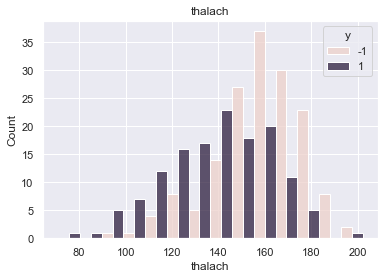

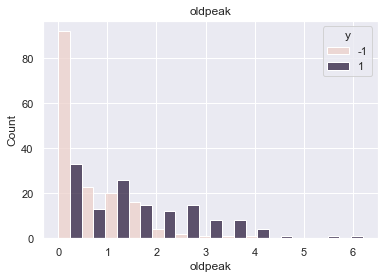

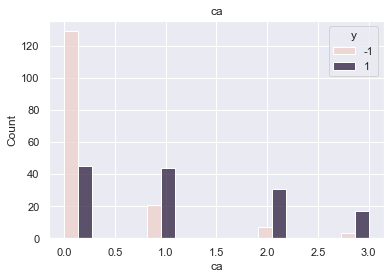

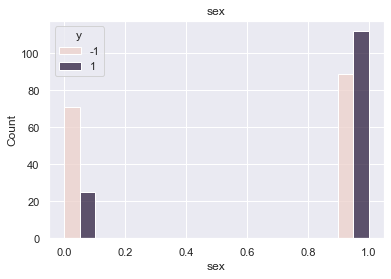

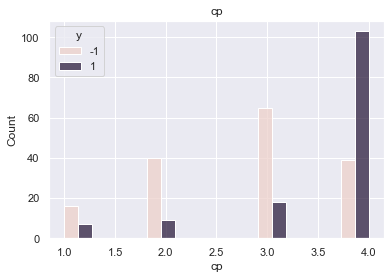

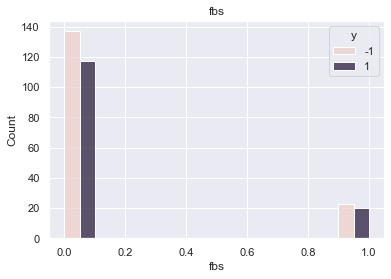

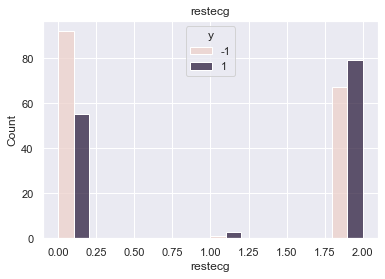

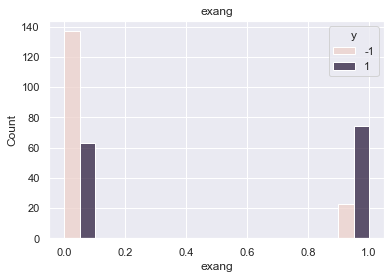

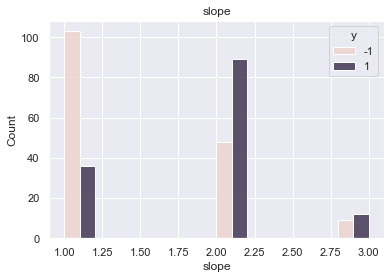

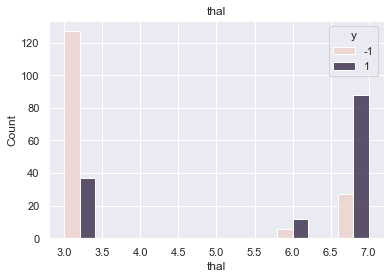

In [34]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']+['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in columns:
    sns.histplot(data=X, x=col, hue='y', stat='count', multiple='dodge')
    plt.title(col)
    plt.show()

Macierz korelacji

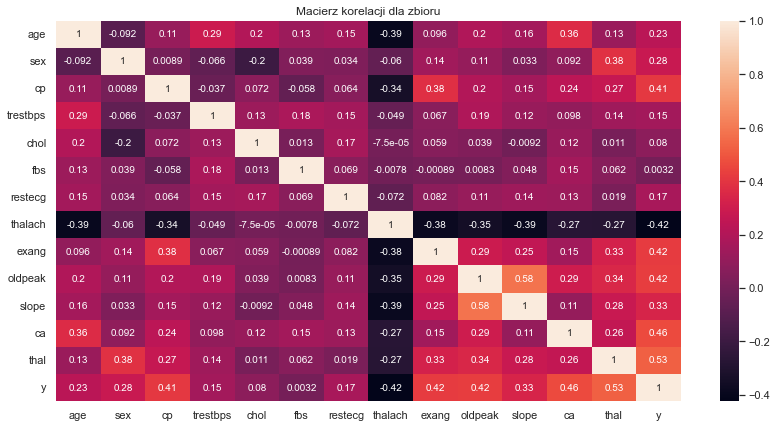

In [35]:
fig, ax = plt.subplots(figsize=(14,7)) 
sns.heatmap(X.corr(), annot=True, ax=ax)
ax.set_title('Macierz korelacji dla zbioru')
plt.show()

Na najskuteczniejszą klasyfikację pozwolą zmienne:
 - thal
 - ca
 - oldpeak
 - thalach
 
Jest tak, ponieważ zmienne te są wysoko skorelowane ze zmienną celu oraz dla niektórych z nich na podstawie histogramu jesteśmy w stanie zaobserowować zależność od choroby.

## Porównanie własnej implementacji i RidgeClassifier na zbiorze o chorobach serca

In [36]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X.drop(columns='y'), X['y'], random_state=254448)

### Własna interpretacja dla 14 cech

In [37]:
classifier1 = AnalyticalRidgeClassifierImplementation()
classifier1.build_classifier(x_train1, y_train1)
y_predict_14_1 = classifier1.predict_target(x_test1)
acc_14_1 = accuracy_score(y_test1, y_predict_14_1)
print('accuracy dla własnej implementacji klasyfikacji liniowej:')
acc_14_1

accuracy dla własnej implementacji klasyfikacji liniowej:


0.7866666666666666

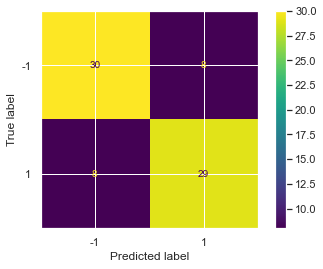

In [38]:
cm3 = confusion_matrix(y_test1, y_predict_14_1, labels=[-1,1])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[-1,1])
disp3.plot()
plt.show()

### Implementacja z sklearn dla 14 cech

In [39]:
classifier2 = RidgeClassifier()
classifier2.fit(x_train1, y_train1)
y_predict_14_2 = classifier2.predict(x_test1)
acc_14_2 = accuracy_score(y_test1, y_predict_14_2)
print('accuracy dla klasyfikacji liniowej z sklearn:')
acc_14_2

accuracy dla klasyfikacji liniowej z sklearn:


0.8133333333333334

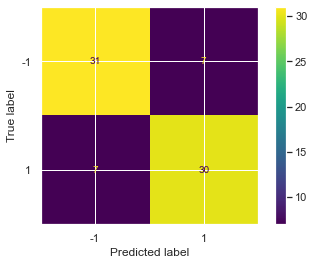

In [40]:
cm4 = confusion_matrix(y_test1, y_predict_14_2, labels=[-1,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[-1,1])
disp.plot()
plt.show()

Implementacja z sklearn lepiej poradziła sobie z klasyfikacją na zbiorze o chorobach serca.

### Automatyczny wybór cech

In [41]:
classifier4 = RidgeClassifier()
sfs = SequentialFeatureSelector(classifier4, n_features_to_select=4)
sfs.fit(X.drop(columns='y'), X['y'])
X_aut_f = sfs.transform(X.drop(columns='y'))

In [42]:
print('Cechy wybrane przez Sequential Feature Selector:')
sfs.get_feature_names_out()

Cechy wybrane przez Sequential Feature Selector:


array(['thalach', 'exang', 'ca', 'thal'], dtype=object)

In [43]:
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(X_aut_f, X['y'], random_state=254448)

Classifier z sklearn:

In [44]:
classifier4.fit(x_train_a, y_train_a)
y_predict_a = classifier4.predict(x_test_a)
acc_a = accuracy_score(y_test_a, y_predict_a)
acc_a

0.7733333333333333

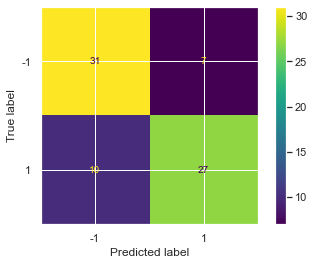

In [45]:
cm_a = confusion_matrix(y_test_a, y_predict_a, labels=[-1,1])
disp_a = ConfusionMatrixDisplay(confusion_matrix=cm_a, display_labels=[-1,1])
disp_a.plot()
plt.show()

Classifier własnej implementacji:

In [46]:
classifier_a = AnalyticalRidgeClassifierImplementation()
classifier_a.build_classifier(x_train_a, y_train_a)
y_predict_a_i = classifier_a.predict_target(x_test_a)
acc_a_i = accuracy_score(y_test_a, y_predict_a_i)
acc_a_i

0.7733333333333333

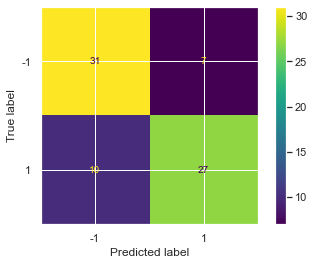

In [47]:
cm_a1 = confusion_matrix(y_test_a, y_predict_a_i, labels=[-1,1])
disp_a1 = ConfusionMatrixDisplay(confusion_matrix=cm_a1, display_labels=[-1,1])
disp_a1.plot()
plt.show()

Oba klasyfikatory dały takie same wyniki na zbiorze testowym.

### Ręczny wybór cech

Implementacja klasyfikacji liniowej z sklearn:

In [48]:
X_m = X[['thal', 'ca', 'oldpeak', 'thalach']]
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X_m, X['y'], random_state=254448)

In [49]:
classifier_m = RidgeClassifier()
classifier_m.fit(x_train_m, y_train_m)
y_predict_m = classifier_m.predict(x_test_m)
acc_m = accuracy_score(y_test_m, y_predict_m)
acc_m

0.7333333333333333

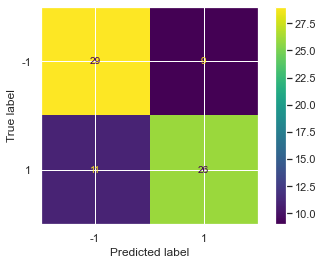

In [50]:
cm_m = confusion_matrix(y_test_m, y_predict_m, labels=[-1,1])
disp_m = ConfusionMatrixDisplay(confusion_matrix=cm_m, display_labels=[-1,1])
disp_m.plot()
plt.show()

Własna interpretacja klasyfikacji liniowej:

In [51]:
classifier_m_i = AnalyticalRidgeClassifierImplementation()
classifier_m_i.build_classifier(x_train_m, y_train_m)
y_predict_m_i = classifier_m_i.predict_target(x_test_m)
acc_m_i = accuracy_score(y_test_m, y_predict_m_i)
acc_m_i

0.7333333333333333

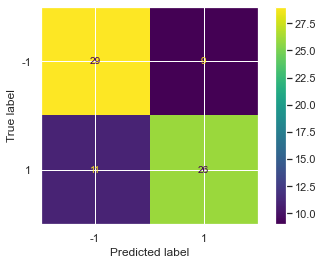

In [52]:
cm_m1 = confusion_matrix(y_test_m, y_predict_m_i, labels=[-1,1])
disp_m1 = ConfusionMatrixDisplay(confusion_matrix=cm_m1, display_labels=[-1,1])
disp_m1.plot()
plt.show()

W tym przypadku obie implementacje klasyfikatora liniowego dały taki sam wynik na zbiorze testowym.

Najlepszy wynik klasyfikacji dał klasyfikator uczony na całym zbiorze.

Cechy wybrane przez SequentialFeatureSelector dają lepszy wynik klasyfikacji niż dane wybrane przeze mnie.